[[ 1.2889  0.4701 -0.2899 -0.4701 -1.      0.      0.      0.      0.
   0.    ]
 [ 0.4701  0.7622 -0.4701  0.7622  0.      0.      0.      0.      0.
   0.    ]
 [-0.2899 -0.4701  1.5788  0.     -0.2899  0.4701 -1.      0.      0.
   0.    ]
 [-0.4701 -0.7622  0.      1.5244  0.4701 -0.7622  0.      0.      0.
   0.    ]
 [-1.      0.     -0.2899  0.4701  2.5788  0.     -0.2899 -0.4701 -1.
   0.    ]
 [ 0.      0.      0.4701 -0.7622  0.      1.5244 -0.4701  0.7622  0.
   0.    ]
 [ 0.      0.     -1.      0.     -0.2899 -0.4701  1.5788  0.     -0.2899
   0.4701]
 [ 0.      0.      0.      0.     -0.4701 -0.7622  0.      1.5244  0.4701
  -0.7622]
 [ 0.      0.      0.      0.     -1.      0.     -0.2899  0.4701  1.2899
  -0.4701]
 [ 0.      0.      0.      0.      0.      0.      0.4701 -0.7622 -0.4701
   0.7622]]


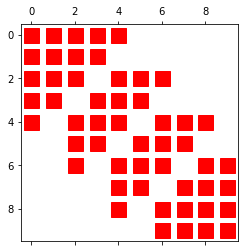

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def generate_indices_csv(filename, n, num_element_stiffness_matrices):
    indices = np.zeros((num_element_stiffness_matrices, 4), dtype=int)
    for i in range(num_element_stiffness_matrices):
        indices[i, :] = np.random.randint(1, n+1, 4)
    df = pd.DataFrame(indices, columns=['i1', 'i2', 'i3','i4'])
    df.to_csv(filename, index=False)

def assemble_global_stiffness_matrix(n, element_stiffness_matrices, indices_df):
    global_stiffness_matrix = np.zeros((n, n))
    for i, row in indices_df.iterrows():
        index = row.tolist()
        for row in range(element_stiffness_matrices[i].shape[0]):
            for col in range(element_stiffness_matrices[i].shape[1]):
                if index[row] <= n and index[col] <= n:
                    global_stiffness_matrix[index[row]-1, index[col]-1] += element_stiffness_matrices[i][row, col]
    return global_stiffness_matrix

n = 10
num_element_stiffness_matrices = 7

element_stiffness_matrices =[np.array([[.2889, .4701,-.2899,-.4701], [.4701, .7622,-.4701,.7622],[-.2899, -.4701,.2899,.4701], [-.4701, -.7622,.4701,.7622]]),
np.array([[1, 0,-1,0], [0, 0,0,0],[-1, 0,1,0], [0, 0,0,0]])
,np.array([[.2889, -.4701,-.2899,.4701], [-.4701, .7622,.4701,-.7622],[-.2899, .4701,.2899,-.4701], [.4701, -.7622,-.4701,.7622]])
,np.array([[1, 0,-1,0], [0, 0,0,0],[-1, 0,1,0], [0, 0,0,0]])
,np.array([[.2889, .4701,-.2899,-.4701], [.4701, .7622,-.4701,.7622],[-.2899, -.4701,.2899,.4701], [-.4701, -.7622,.4701,.7622]])
,np.array([[1, 0,-1,0], [0, 0,0,0],[-1, 0,1,0], [0, 0,0,0]])
,np.array([[.2889, -.4701,-.2899,.4701], [-.4701, .7622,.4701,-.7622],[-.2899, .4701,.2899,-.4701], [.4701, -.7622,-.4701,.7622]])]
#filename = 'indices.csv'
#generate_indices_csv(filename, n, num_element_stiffness_matrices)
indices_df = pd.read_csv('/content/indices4.csv')
global_stiffness_matrix = assemble_global_stiffness_matrix(n, element_stiffness_matrices, indices_df)
print(global_stiffness_matrix)
# Plot the global stiffness matrix as a sparse plot array
plt.spy(global_stiffness_matrix, markersize=15, color='red')
plt.show()
# Save the global stiffness matrix in a text file
np.savetxt("global_stiffness_matrix.txt", global_stiffness_matrix, fmt='%d')
# Save the global stiffness matrix in Python matrix format
import numpy as np

with open('global_stiffness_matrix.py', 'w') as f:
    f.write('import numpy as np\n\n')
    f.write('global_stiffness_matrix = np.array([\n')
    for i in range(global_stiffness_matrix.shape[0]):
        f.write('    [')
        for j in range(global_stiffness_matrix.shape[1]):
            f.write(str(global_stiffness_matrix[i][j]))
            if j < global_stiffness_matrix.shape[1] - 1:
                f.write(', ')
        f.write(']')
        if i < global_stiffness_matrix.shape[0] - 1:
            f.write(',\n')
    f.write('])\n')
     

In [ ]:

#THE FORCE VECTOR LOOKS LIKE THIS
#[0,0,0,0,0,-100,0,0,0,0] SO YOU CAN SOLVE FOR THIS VECTOR
# THE ABOVE RESULTS ARE CORRECT AND TESTED

[[ 18.11   30.184   0.      0.      0.      0.      0.      0.      0.
  -18.11  -30.184   0.   ]
 [ 30.184  50.35    0.      0.      0.      0.      0.      0.      0.
  -30.184 -50.35    0.   ]
 [  0.      0.      0.      0.      0.      0.      0.      0.      0.
    0.      0.      0.   ]
 [  0.      0.      0.      8.425 -21.097   8.425   0.      0.      0.
   -8.425  21.097  -8.425]
 [  0.      0.      0.    -21.097  52.707 -21.037   0.      0.      0.
   21.09  -52.707  21.097]
 [  0.      0.      0.      8.425 -21.097   8.425   0.      0.      0.
   -8.425  21.097  -8.425]
 [  0.      0.      0.      0.      0.      0.      8.425  21.097  -8.425
   -8.425  21.097   8.425]
 [  0.      0.      0.      0.      0.      0.    -21.097  52.707  21.097
   21.097 -52.707 -21.097]
 [  0.      0.      0.      0.      0.      0.     -8.425  21.097   8.425
    8.425 -21.097  -8.425]
 [-18.11  -30.184   0.     -8.425  21.097  -8.425  -8.425  21.097   8.425
   34.96  -12.01    0.   ]
 [-30.18

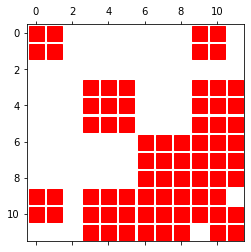

In [25]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


def generate_indices_csv(filename, n, num_element_stiffness_matrices):
    indices = np.zeros((num_element_stiffness_matrices, 6), dtype=int)
    for i in range(num_element_stiffness_matrices):
        indices[i, :] = np.random.randint(1, n+1, 6)
    df = pd.DataFrame(indices, columns=['i1', 'i2', 'i3', 'i4', 'i5','i6'])
    df.to_csv(filename, index=False)

def assemble_global_stiffness_matrix(n, element_stiffness_matrices, indices_df):
    global_stiffness_matrix = np.zeros((n, n))
    for i, row in indices_df.iterrows():
        index = row.tolist()
        for row in range(element_stiffness_matrices[i].shape[0]):
            for col in range(element_stiffness_matrices[i].shape[1]):
                if index[row] <= n and index[col] <= n:
                    global_stiffness_matrix[index[row]-1, index[col]-1] += element_stiffness_matrices[i][row, col]
    return global_stiffness_matrix

n = 12
num_element_stiffness_matrices = 3
element_stiffness_matrices =[
np.array([[18.11,30.184,0,-18.11,-30.184,0], [30.184,50.350,0,-30.184,-50.350,0],[0,0,0,0,0,0], [-18.11,-30.184,0,18.11,30.184,0],[-30.184,-50.350,0,30.184,50.350,0], [0,0,0,0,0,0]])
,np.array([[8.425,-21.097,8.425,-8.425,21.097,-8.425], [-21.097,52.707,-21.037,21.09,-52.707,21.097],[8.425,-21.097,8.425,-8.425,21.097,-8.425], [-8.425,21.097,-8.425,8.425,-21.097,8.425],[21.097,-52.707,21.097,-21.097,52.707,21.097], [-8.425,21.097,-8.425,8.425,-21.097,8.425]])
,np.array([[8.425,21.097,-8.425,-8.425,21.097,8.425], [-21.097,52.707,21.097,21.097,-52.707,-21.097],[-8.425,21.097,8.425,8.425,-21.097,-8.425], [-8.425,21.097,8.425,8.425,-21.097,-8.425],[21.097,-52.707,-21.097,-21.097,52.707,21.097], [8.425,-21.097,-8.425,-8.425,-8.425,21.097]])]


#filename = '/content/indices6.csv'
#generate_indices_csv(filename, n, num_element_stiffness_matrices)
indices_df = pd.read_csv('/content/indices6RAO.csv')
global_stiffness_matrix = assemble_global_stiffness_matrix(n, element_stiffness_matrices, indices_df)
print(global_stiffness_matrix)
# Plot the global stiffness matrix as a sparse plot array
plt.spy(global_stiffness_matrix, markersize=15, color='red')
plt.show()
# Save the global stiffness matrix in a text file
np.savetxt("global_stiffness_matrix.txt", global_stiffness_matrix, fmt='%d')

In [ ]:
#force vector [0,0,0,0,0,0,0,0,0,0,-10,0]